In [3]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

In [4]:
gg = 9.8
rho = 997
beta = 0.25
t = 0
dt = 0.1

In [5]:
class Wave:
    amp = 0.
    k = 0.
    omega = 0.
    phase = 0.
    def __init__(self, a, o, p):
        self.amp = a
        self.omega = o
        self.k = o*o/gg
        self.phase = p
    
    def get(self,x, t):
        return self.amp*math.sin(self.omega*t + self.k*x + self.phase)


In [44]:
class Water:
    waves = []
    def __init__(self, num, random_wave):
        if(random_wave==True):
            for i in range(num):
                newWave = Wave(random.uniform(0.001,0.005),random.uniform(2,10),random.uniform(1,10))
                self.waves.append(newWave)
        elif(num==0):
            self.waves.append(Wave(0,0,0))
        else:
            self.waves.append(Wave(0.01,1,0))
            
    def get(self,x,t):
        waveheight = 0
        for w in self.waves:
            waveheight += w.get(x,t)
        return waveheight

In [38]:
class Particle:
    posx = 0
    posz = 0
    velx = 0
    velz = 0
    accx = 0
    accz = 0
    
    angle = 0
    anglevel = 0
    angleacc = 0

    pl = 3.11
    ph = 0.34
    pw = 0.94
    pv = 0.0878
    mass = pv*100
    cgh = 0.340

    draught = 0

    def __init__(self,x,z):
        self.posx = x
        self.posz = z

    def calcAcc(self):
        tFx=0
        tFz=0
        tM=0

        #Gravity
        tFz -= self.mass*gg 

        cP = ww.get(self.posx,t)
        self.draught = min(max(cP-(self.posz-self.ph),0), self.ph)
            
        nx = math.cos(self.angle - math.pi/2)
        ny = math.sin(self.angle - math.pi/2)

        if(self.draught>0):
          #buoyancy estimate with box
          tFz += rho*(self.draught/self.ph*self.pv)*gg

          for w in ww.waves:
            tFz += calcFz(self.velx,w.omega)
            tFx += calcFx(self.velx,w.omega)
            


          self.accx = surge
          self.accz = heave

    def update(self,en_thr):
      self.calcAcc()
      self.velx += self.accx*dt
      self.velz += self.accz*dt
      self.posx += self.velx*dt
      self.posz += self.velz*dt
      # print("x=" + "{:.2f}".format(self.posx))
      # print("z=" + "{:.2f}".format(self.posz))
    
   
 

In [90]:
ww = Water(0,random_wave=False)
pp = Particle(0,1)
dt = 0.001
t=0
dl = []
xl = []
zl = []
zvl= []
zal =[]
eng = [] 

for i in range(100000):
    pp.update(en_thr=False)
    dl.append(pp.draught)
    xl.append(pp.posx)
    zl.append(pp.posz)
    zvl.append(pp.velz)
    zal.append(pp.accz)
    eng.append(pp.mass*pp.velz**2)
    t+=dt




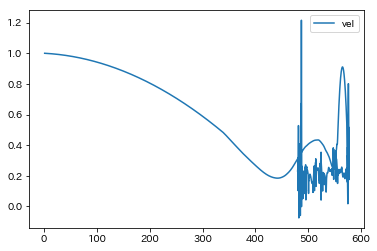

In [91]:
fig, ax = plt.subplots()
tdata = np.arange(0,10000*dt,dt)
# ax.set_ylim(-0.5,0.5)
# ax.plot(tdata,zl,label="pos")
# ax.plot(tdata,zvl,label="vel")
# ax.plot(tdata,zal,label="acc")
# ax.plot(tdata,eng,label="energy")

ax.plot(xl,zl,label="vel")


ax.legend()